In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.spatial import distance
# from scipy.sparse.csgraph import minimum_spanning_tree
import math
import pickle
import time
import pandas as pd


## USING PREVIOUS DATA

We want to be able to save thing 

IF Pickled = True then we will previously simulated data using the pickle packge

In [2]:
PICKLED = True

##### set parent directory

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()
# print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Updated Directory: /mnt/c/users/rjmay/code/research_ms


In [4]:
# os.chdir(os.getcwd() + "/code/research_ms")


### Simulation stage

In [5]:
from modules.multi_bounds_v2 import bounds_class
from modules.Bhatt_knn_func import knn_num_calc

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
mean_sep = np.linspace(0, 5, 10000 , endpoint = True)


In [7]:
exact = []

for i in mean_sep:
    dx = 0.001
    x = np.arange(-5, 8 + dx, dx)
    f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
    f1 = np.exp(-0.5 * (x - i)**2) / np.sqrt(2 * np.pi)
    fmin = np.minimum(f0, f1)
    BER = 0.5 * np.sum(fmin * dx)
    exact.append(BER)

#     print("BER 2d:", BER)

In [8]:
x = np.linspace(0,.5, 21, endpoint = True) ## this is the desired mean BER points to be calculated at 

new_mean_sep = [] 
for j in x:
    index = (np.abs(j - np.array(exact) )).argmin()
    new_mean_sep.append(mean_sep[index])

In [9]:
mean_sep = new_mean_sep

In [10]:
bound_obj_lst = []
bound_obj_lst2 = []


if PICKLED: ## We just skip all the data creation if we are using save data. 
    print("USING PREVIOUS DATA NOT SIMULATING DATA ")
else:

    MC_num = 400
    sample_size= 500


    for i in mean_sep:

        start = time.time()
        dim =3 
        mean1 = np.zeros(dim)
        covariance1 = np.identity(dim)
        mean2 = np.zeros(dim)
        mean2[0] = i
        covariance2= np.identity(dim)

        
        sample_size= 500
        n0, n1 = sample_size, sample_size
        
        
        k = knn_num_calc(n0, len(mean1))

        params1  = [mean1, covariance1, n0]
        params2  = [mean2, covariance2, n1]

        bounds = bounds_class("mv_normal", params1, params2, threads =2,  MC_num = MC_num, k_nn=k)
        
        print("done with 3d ", end = " ")
        dim = 8
        mean1 = np.zeros(dim)
        covariance1 = np.identity(dim)
        mean2 = np.zeros(dim)
        mean2[0] = i
        covariance2= np.identity(dim)

        
        bound_obj_lst.append(bounds)
        
        sample_size= 500
        n0, n1 = sample_size, sample_size
        params1  = [mean1, covariance1, n0]
        params2  = [mean2, covariance2, n1]        
        k = knn_num_calc(n0, len(mean1))

        
        bounds2 = bounds_class("mv_normal", params1, params2, threads =2,  MC_num = MC_num, k_nn =k )

        bound_obj_lst2.append(bounds2)
        
        
        end = time.time()
        
        print("done with ", i, " in ",  end -start )



done with 3d  done with  5.0  in  424.20840978622437
done with 3d  done with  3.91989198919892  in  412.5677053928375
done with 3d  done with  3.28982898289829  in  446.9254744052887
done with 3d  done with  2.879287928792879  in  447.63729763031006
done with 3d  done with  2.563256325632563  in  337.044784784317
done with 3d  done with  2.300730073007301  in  374.7701759338379
done with 3d  done with  2.0727072707270726  in  360.51668334007263
done with 3d  done with  1.8691869186918693  in  341.997266292572
done with 3d  done with  1.683168316831683  in  367.4516534805298
done with 3d  done with  1.5106510651065106  in  363.7351801395416
done with 3d  done with  1.349134913491349  in  361.3091378211975
done with 3d  done with  1.1956195619561956  in  365.7041280269623
done with 3d  done with  1.0486048604860485  in  278.7879581451416
done with 3d  done with  0.9075907590759076  in  321.4745330810547
done with 3d  done with  0.7705770577057706  in  325.22692012786865
done with 3d  don

##### Pickling
This is where the data either gets save or loaded

In [11]:
file_path = 'sim_data/means_sep_as_BER_v3.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE


if PICKLED  == False:
    
    objects_to_save = bound_obj_lst, bound_obj_lst2


    with open(file_path, 'wb') as file:
        # Use pickle.dump to serialize and write the list of objects to the file
        pickle.dump(objects_to_save, file)
    print(f'Objects saved to {file_path}')
    

elif PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    bound_obj_lst, bound_obj_lst2 = loaded_objects

Objects saved to sim_data/means_sep_as_BER_v3.pkl


## Using the data

may or not be pickled. 

In [12]:
exact = []

for i in mean_sep:
    dx = 0.001
    x = np.arange(-5, 8 + dx, dx)

    f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
    f1 = np.exp(-0.5 * (x - i)**2) / np.sqrt(2 * np.pi)

    fmin = np.minimum(f0, f1)

    BER = 0.5 * np.sum(fmin * dx)
    
    exact.append(BER)

#     print("BER 2d:", BER)

### Plotting using dim 3

In [13]:
df = pd.DataFrame([obj() for obj in bound_obj_lst], index = exact)


# df

In [14]:
fs = 14
dpi =300

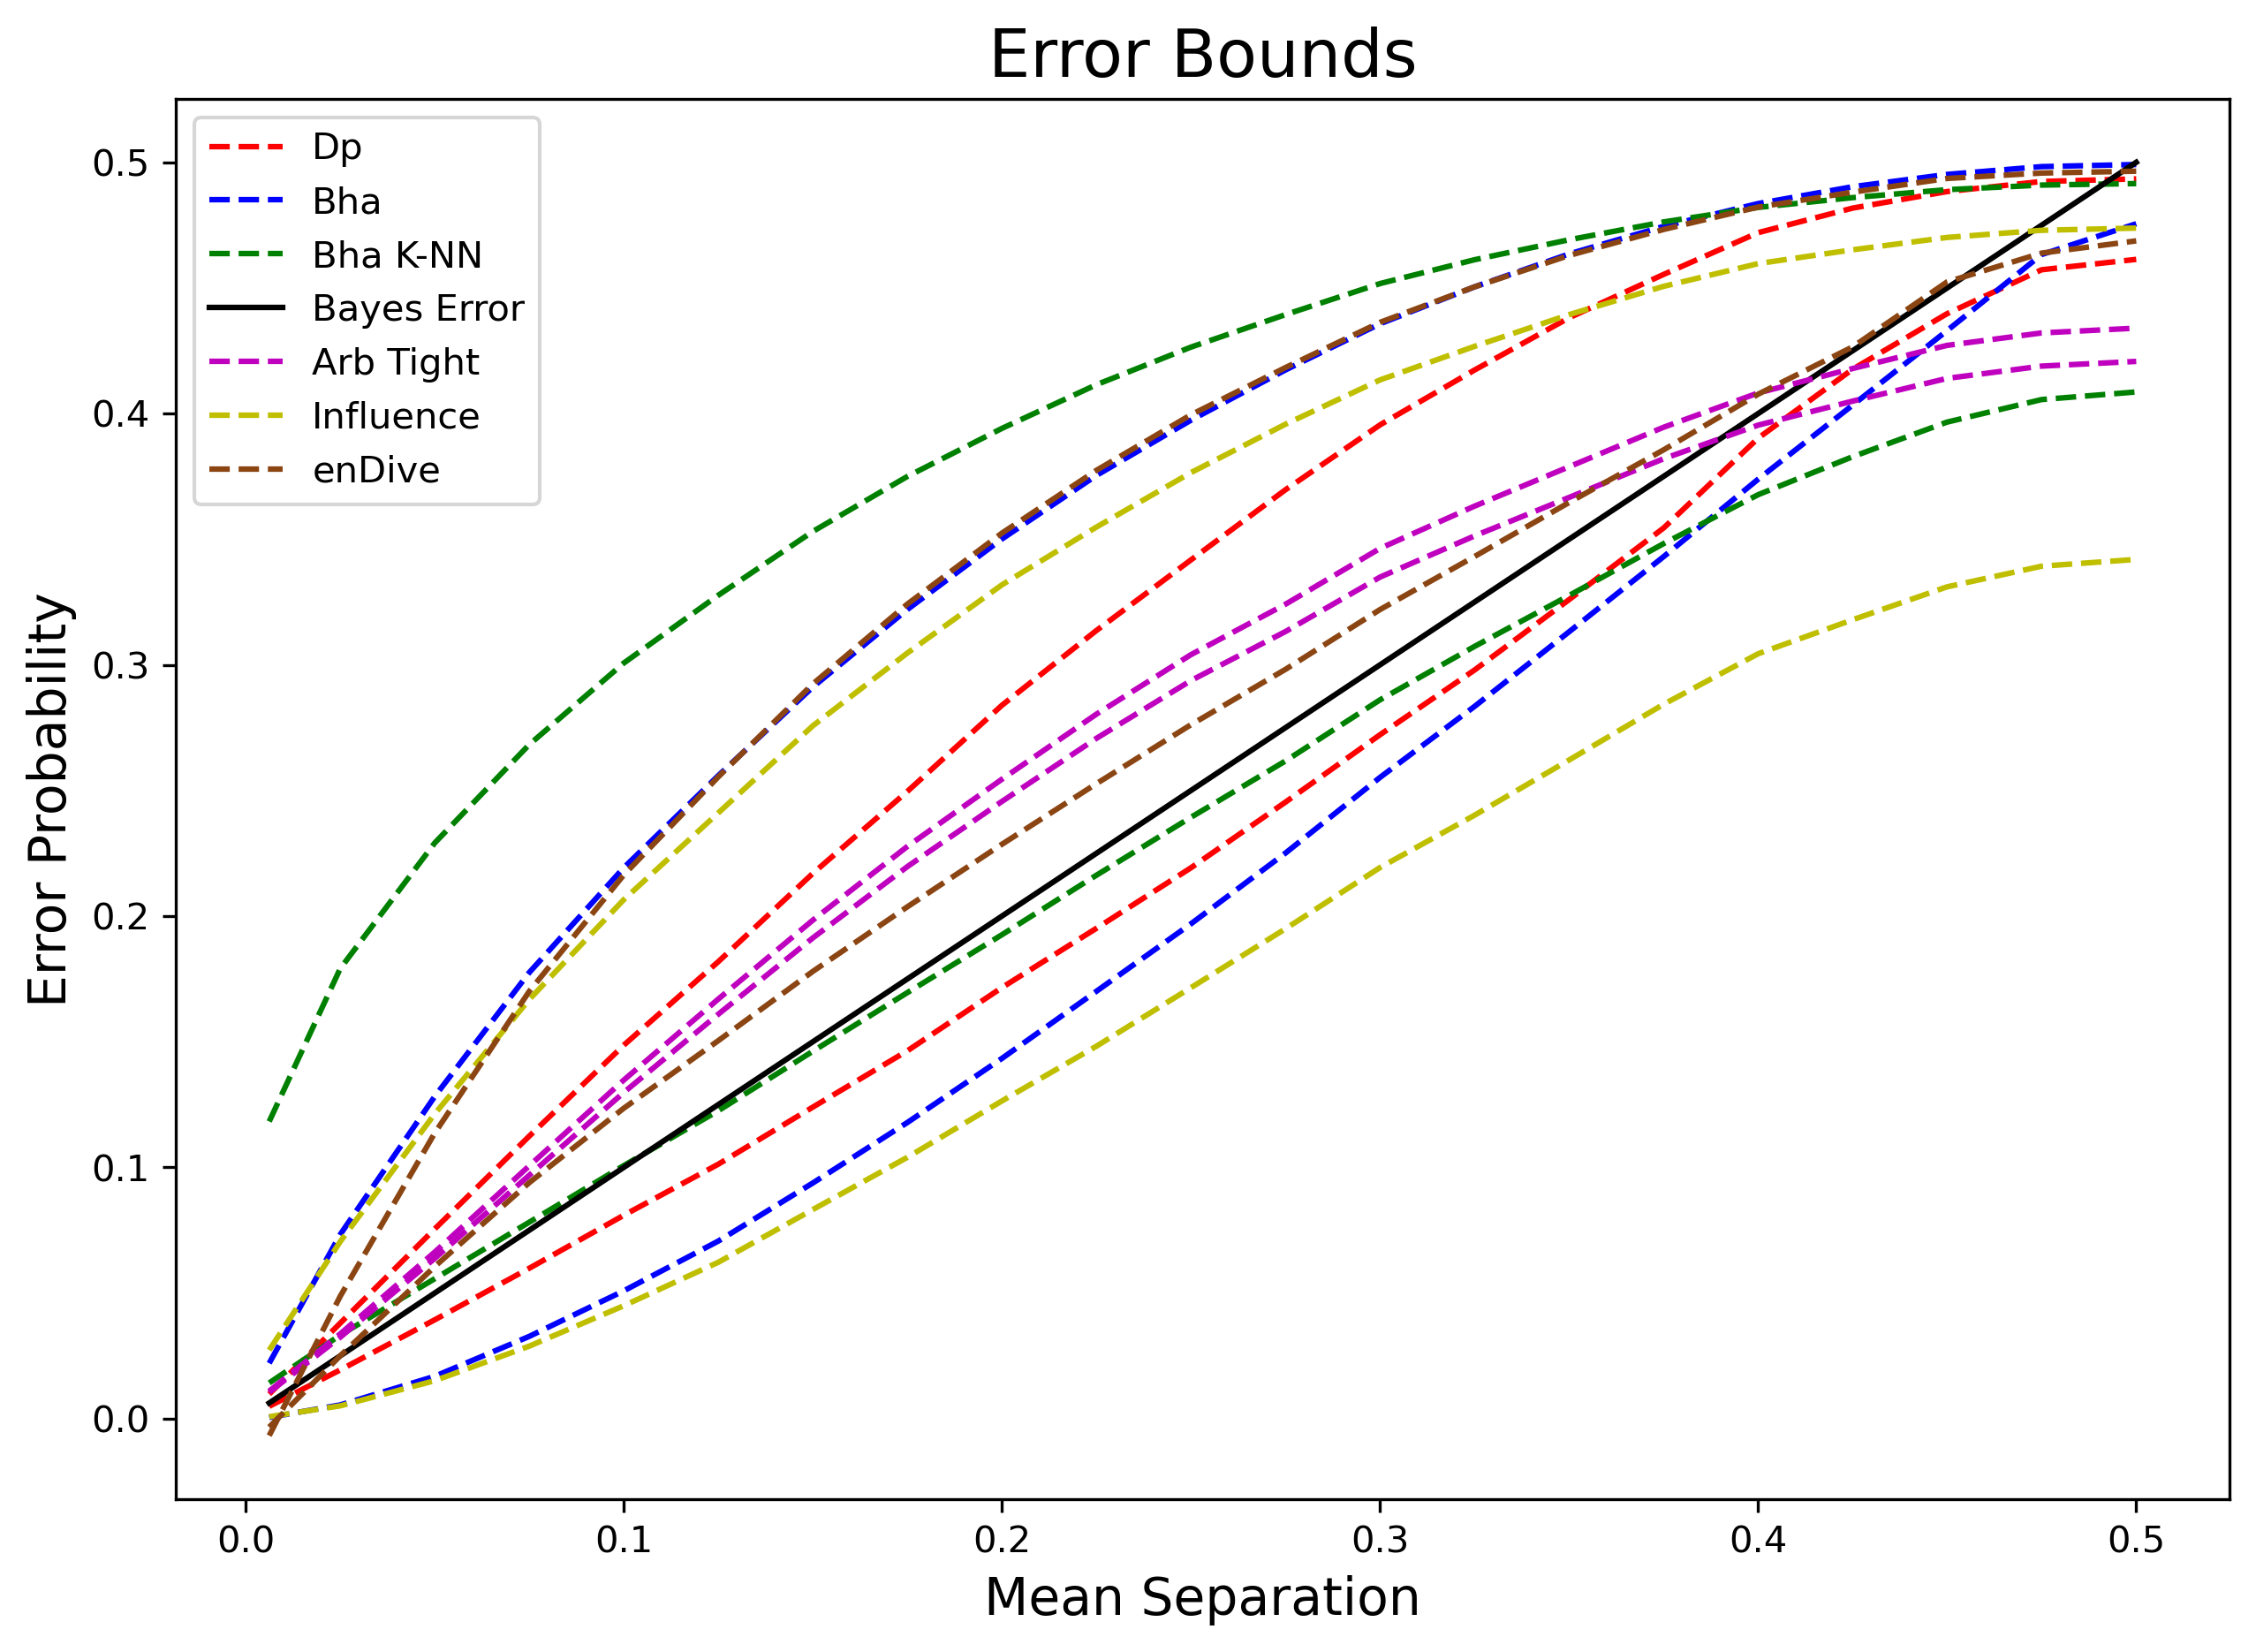

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), dpi = dpi)

# Plot Dp
ax.plot(df["Dp_lower"], 'r--', label='Dp')
ax.plot(df["Dp_upper"], 'r--')

# Plot Bha
ax.plot(df["Bha_lower"], 'b--', label='Bha')
ax.plot(df["Bha_upper"], 'b--')

# Plot Bha K-NN
ax.plot(df["Bha_knn_lower"], 'g--')
ax.plot(df["Bha_knn_upper"], 'g--', label='Bha K-NN')

# Plot Bayes Error
ax.plot(exact, exact, 'k', label='Bayes Error')

# Plot Lower and Upper G_a
ax.plot(df["tight_lower"], 'm--', label="Arb Tight")
ax.plot(df["tight_upper"], 'm--')


# Plot Maha
# ax.plot( df["Maha_upper"], 'y--', label='Maha')
# ax.scatter(df.index, df["Maha_upper"], color='y', marker='*')

# Plot Lower and Upper G_a
ax.plot(df["inf_lower"], 'y--', label="Influence")
ax.plot(df["inf_upper"], 'y--')



# Plot Lower and Upper enDive
ax.plot(df["enDive_lower"], 'saddlebrown', ls = '--', label="enDive")
ax.plot(df["enDive_upper"], 'saddlebrown', ls = '--',)

ax.set_xlabel("Mean Separation", fontsize=fs)
ax.set_ylabel("Error Probability", fontsize=fs)
ax.set_title("Error Bounds", fontsize=fs + 4)
ax.legend()

plt.show()


In [16]:
validity_lst  =[]
for i in range(len(exact)):
    validity_lst.append(bound_obj_lst[i].validity(exact[i]))
    
import pandas as pd
df = pd.DataFrame(validity_lst, index = exact)
# df

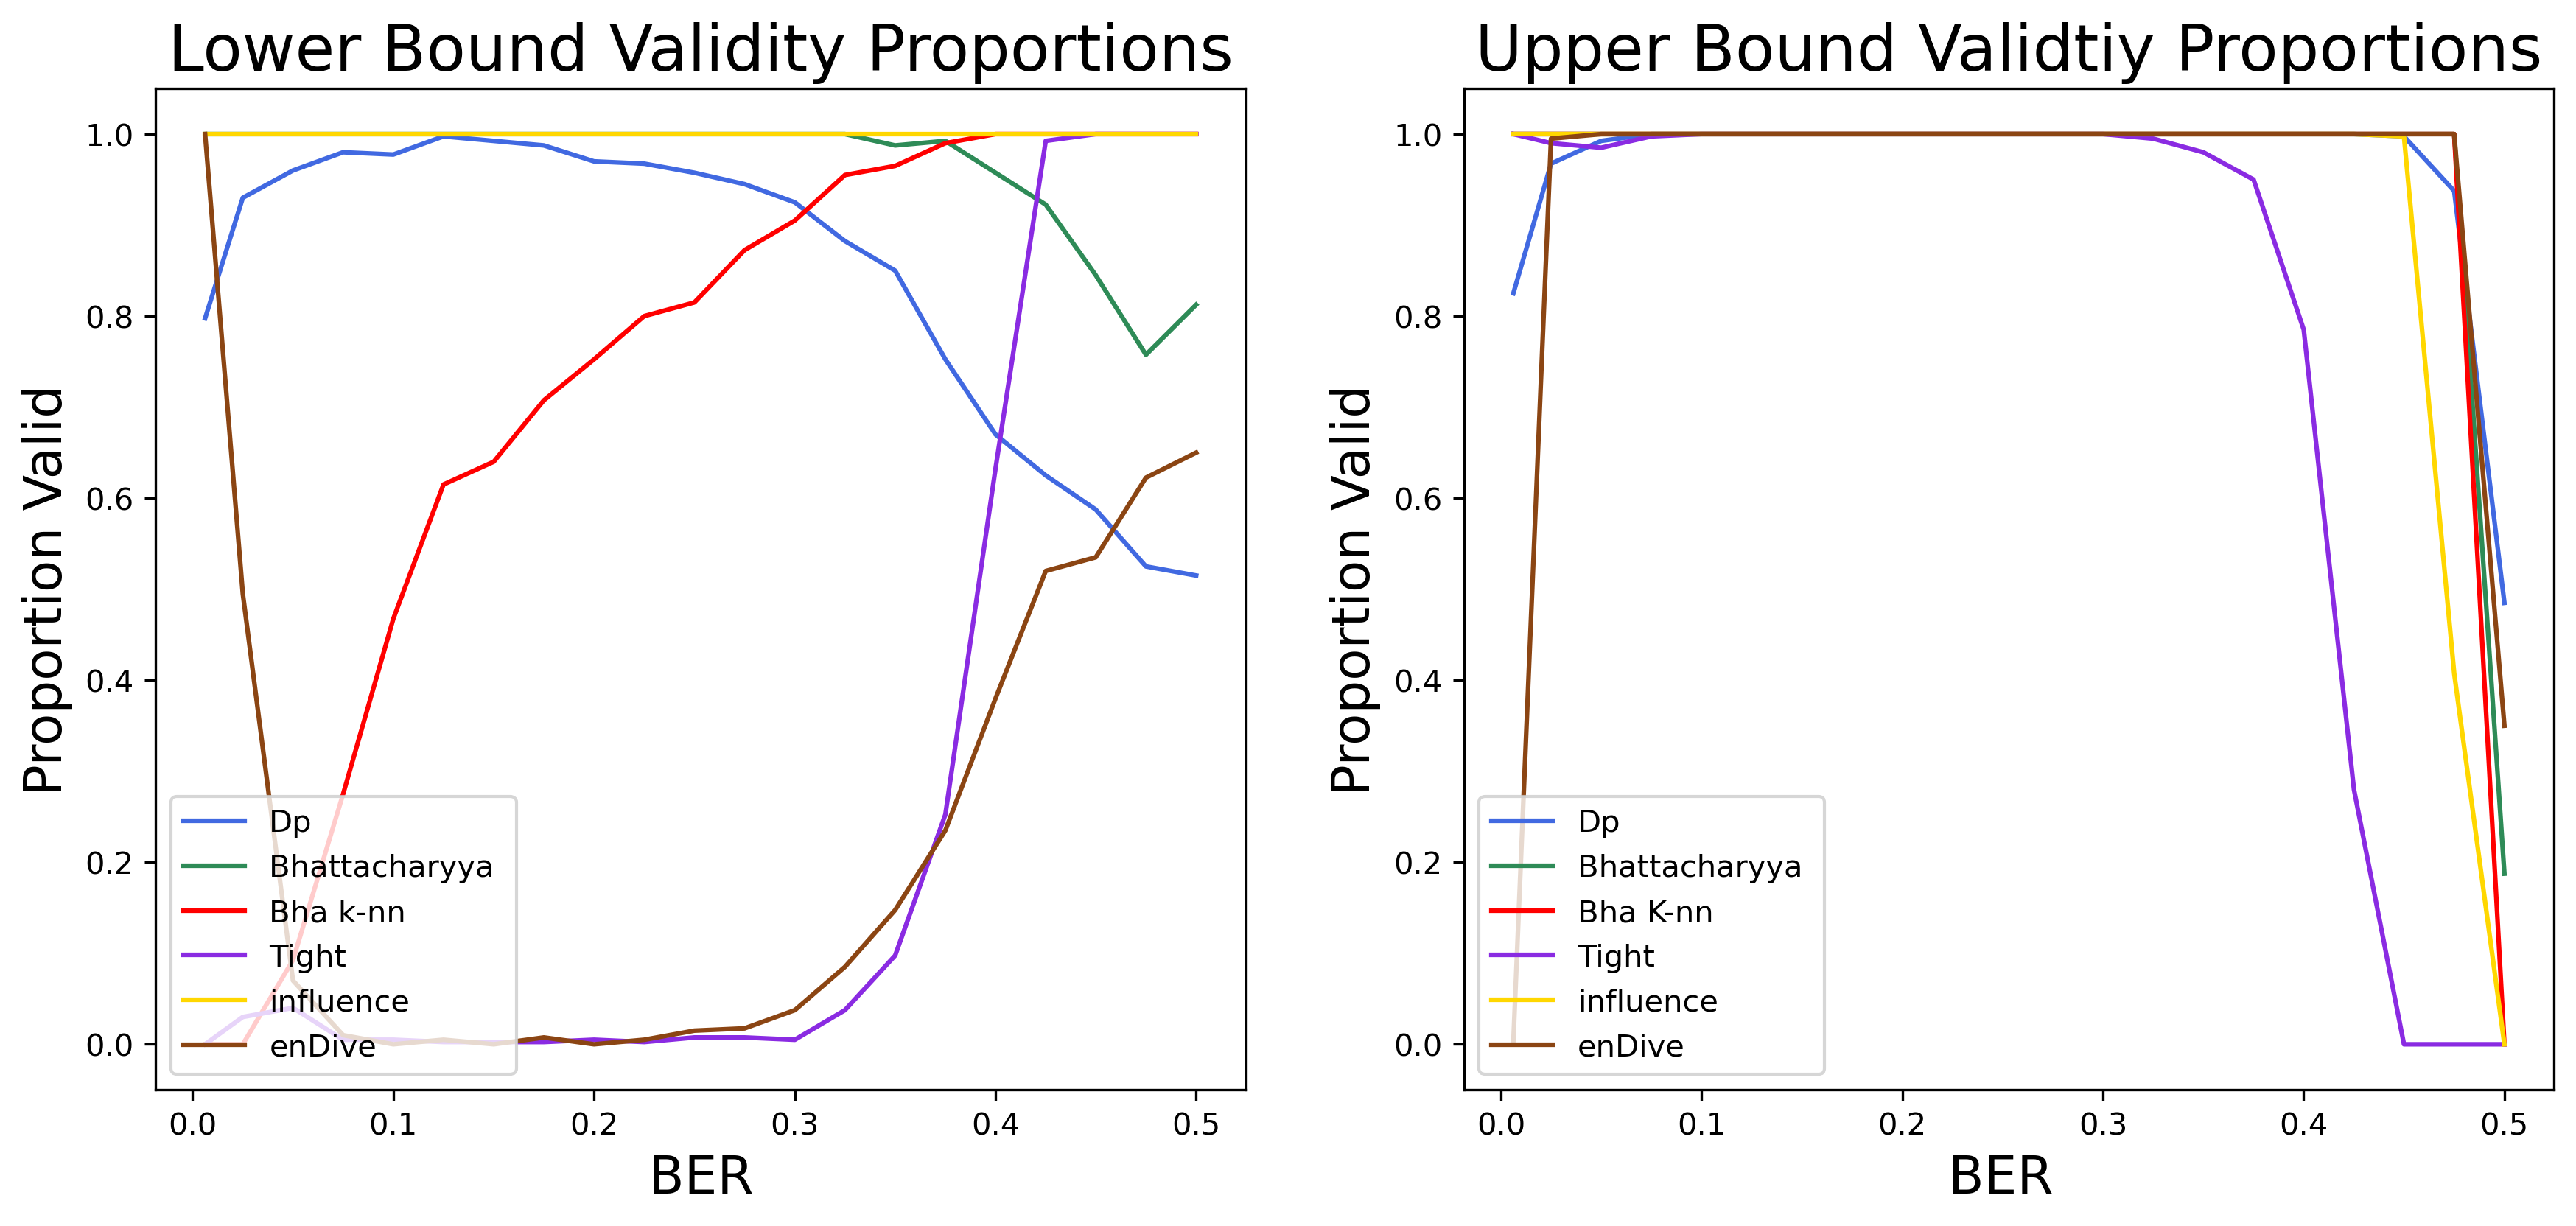

In [17]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi = dpi)

ax = axes[0]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df['Dp_lower'], 'royalblue',  label='Dp')

ax.plot(df['Bha_lower'],'seagreen', label='Bhattacharyya ')

ax.plot(df['Bha_knn_lower'],'r', label='Bha k-nn ')

ax.plot(df['tight_lower'], 'blueviolet', label='Tight ')

ax.plot(df['inf_lower'], 'gold', label= 'influence')

ax.plot(df['enDive_lower'], 'saddlebrown', label= 'enDive')


ax.set_xlabel("BER", fontsize = fs)
ax.set_ylabel("Proportion Valid", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend(loc=3)



ax = axes[1]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df['Dp_upper'], 'royalblue',  label='Dp')

ax.plot(df['Bha_upper'],'seagreen', label='Bhattacharyya ')

ax.plot(df['Bha_knn_upper'],'r', label='Bha K-nn ')

ax.plot(df['tight_upper'], 'blueviolet', label='Tight ')

ax.plot(df['inf_upper'], 'gold', label= 'influence')

ax.plot(df['enDive_upper'], 'saddlebrown', label= 'enDive')

# ax.set_ylim([.4, 1.025])
# ax.set_yticks(np.linspace(.5,1,6))


ax.set_xlabel("BER ", fontsize = fs)
ax.set_ylabel("Proportion Valid", fontsize=fs)
ax.set_title("Upper Bound Validtiy Proportions" , fontsize = fs +4)
ax.legend(loc=3)


# plt.savefig("proportions_v2.jpeg",facecolor=(1,1,1,1))
plt.show()

### Plotting using dim 8 

In [18]:

df = pd.DataFrame([obj() for obj in bound_obj_lst2], index = exact)


In [19]:
dpi = 400
fs =17

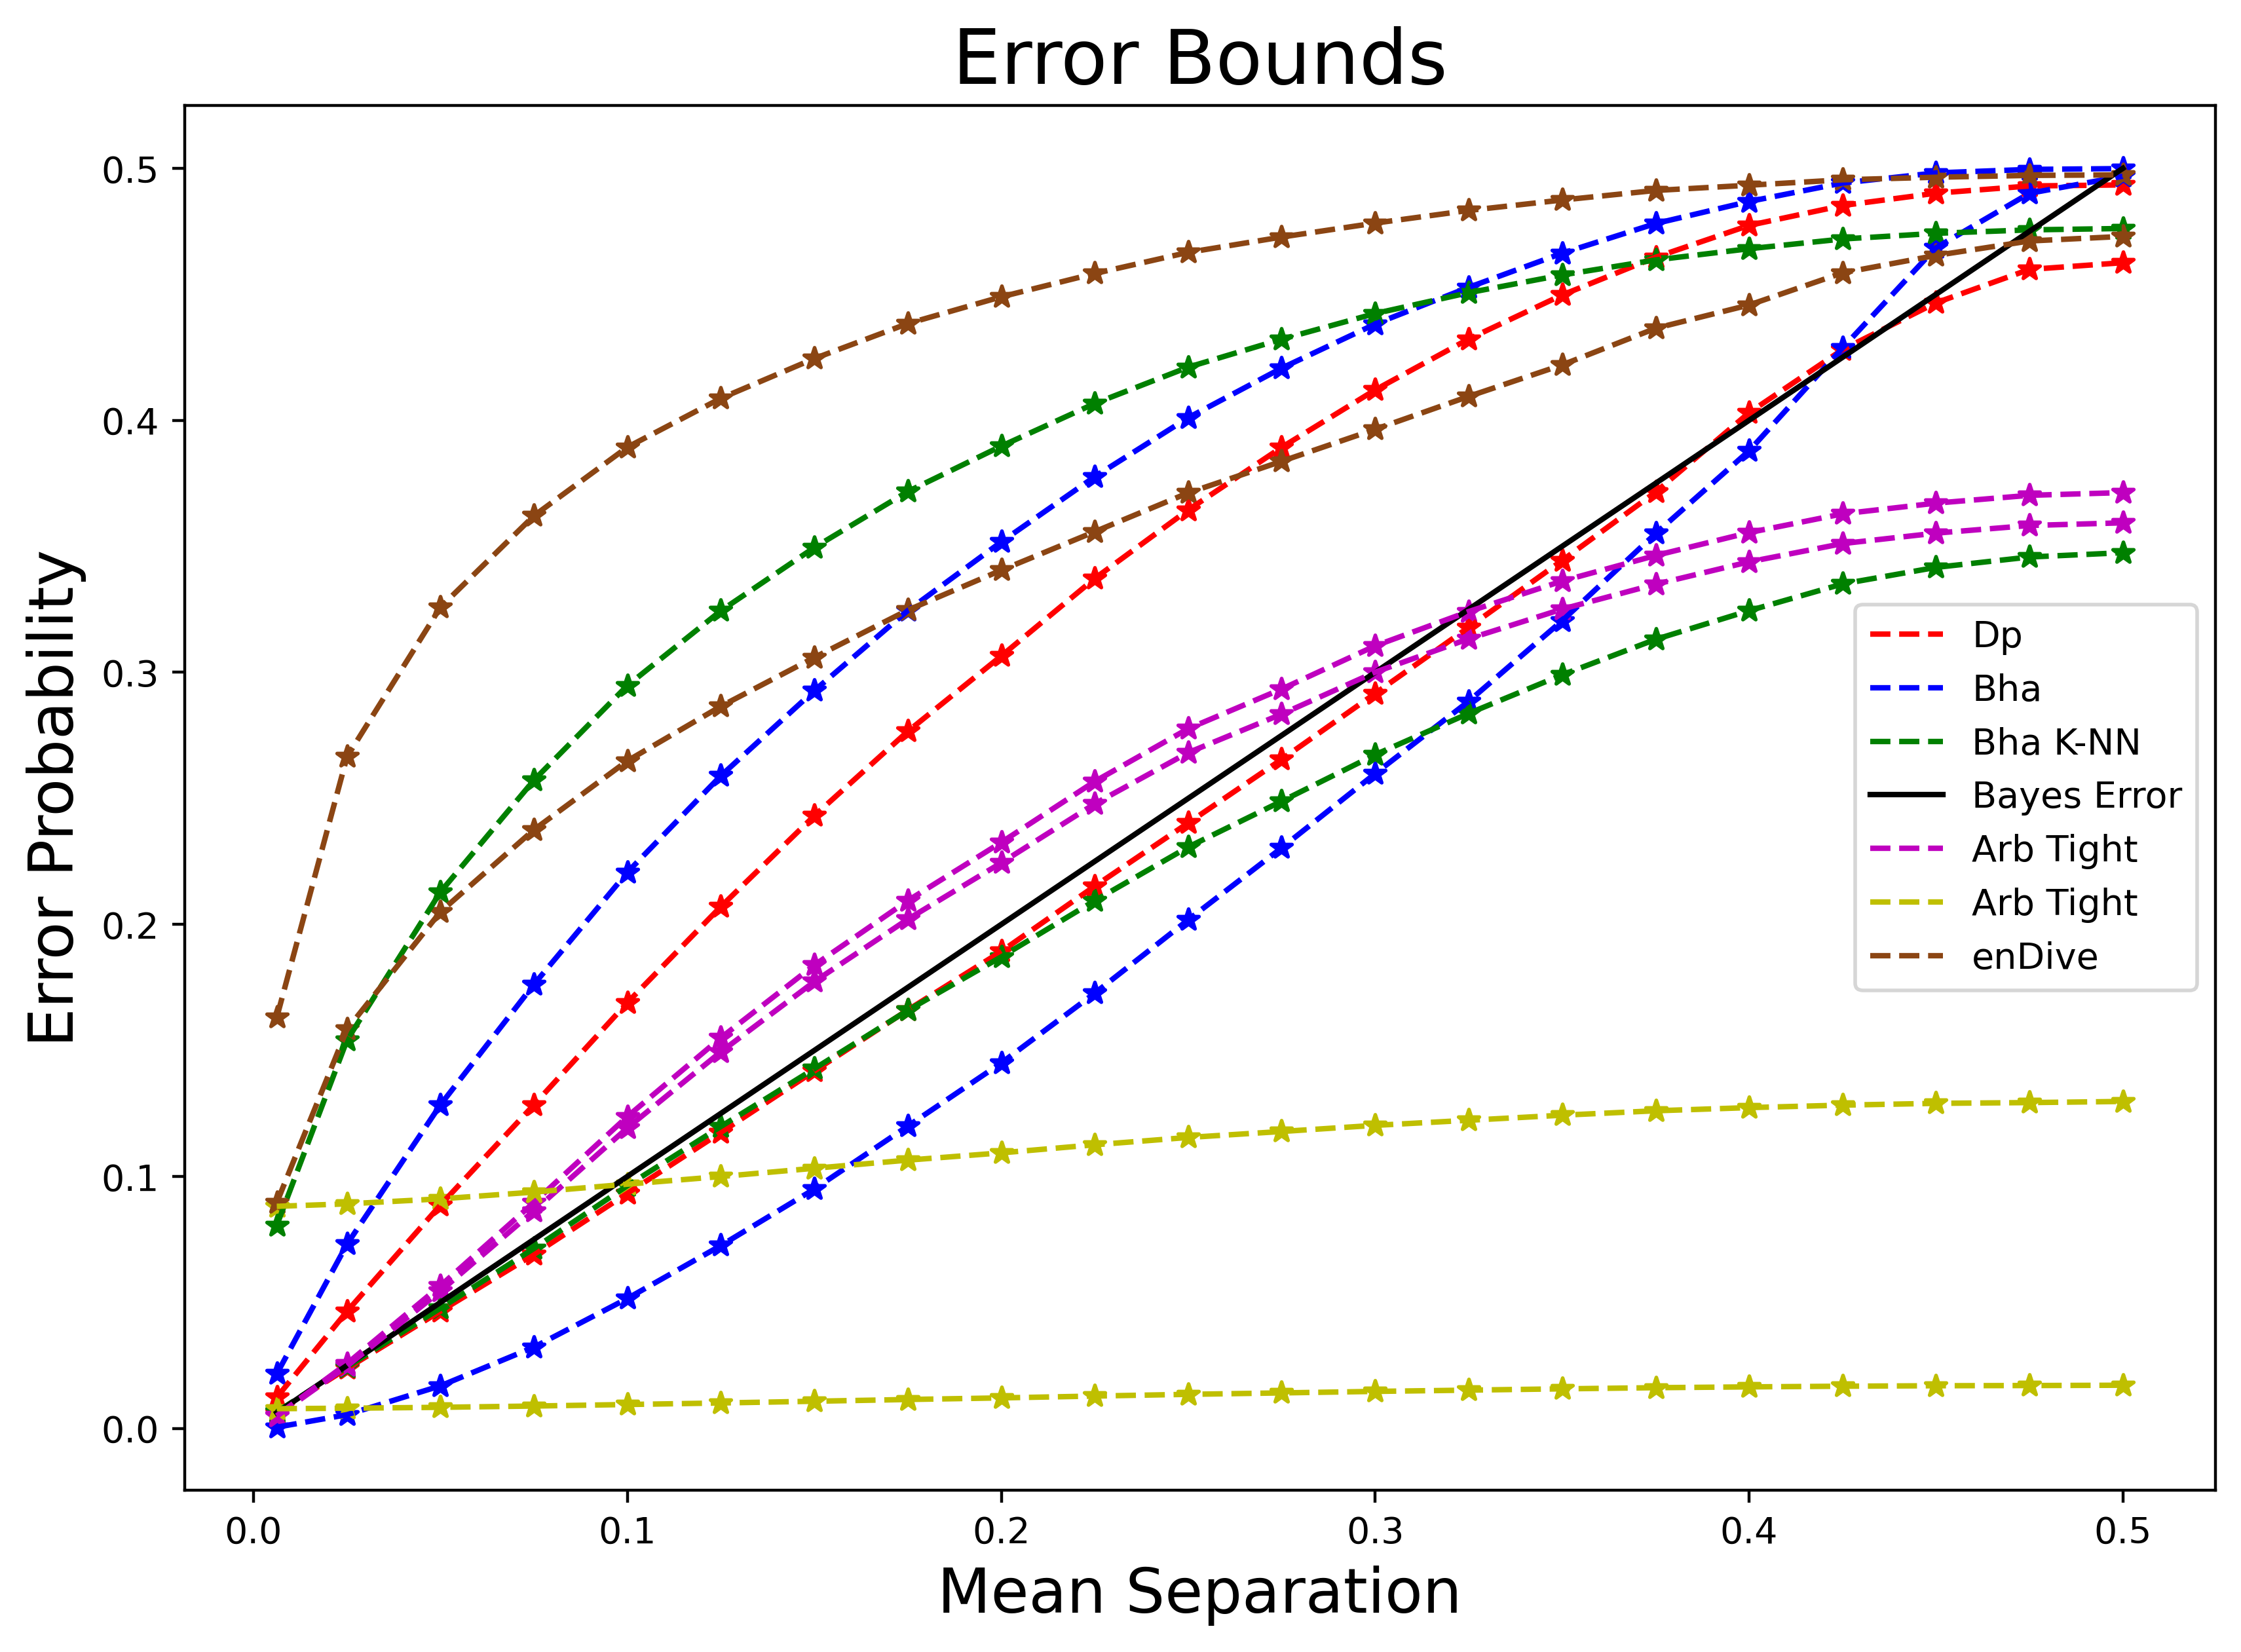

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), dpi = dpi)


# Plot Dp
ax.plot(df["Dp_lower"], 'r--', label='Dp')
ax.plot(df["Dp_upper"], 'r--')
ax.scatter(df.index, df["Dp_lower"], color='r', marker='*')
ax.scatter(df.index, df["Dp_upper"], color='r', marker='*')

# Plot Bha
ax.plot(df["Bha_lower"], 'b--', label='Bha')
ax.plot(df["Bha_upper"], 'b--')
ax.scatter(df.index, df["Bha_upper"], color='b', marker='*')
ax.scatter(df.index, df["Bha_lower"], color='b', marker='*')

# Plot Bha K-NN
ax.plot(df["Bha_knn_lower"], 'g--')
ax.plot(df["Bha_knn_upper"], 'g--', label='Bha K-NN')
ax.scatter(df.index, df["Bha_knn_upper"], color='g', marker='*')
ax.scatter(df.index, df["Bha_knn_lower"], color='g', marker='*')

# Plot Bayes Error
ax.plot(exact, exact, 'k', label='Bayes Error')

# Plot Lower and Upper G_a
ax.plot(df["tight_lower"], 'm--', label="Arb Tight")
ax.plot(df["tight_upper"], 'm--')
ax.scatter(df.index, df["tight_lower"], color='m', marker='*')
ax.scatter(df.index, df["tight_upper"], color='m', marker='*')

# Plot Maha
# ax.plot( df["Maha_upper"], 'y--', label='Maha')
# ax.scatter(df.index, df["Maha_upper"], color='y', marker='*')

# Plot Lower and Upper G_a
ax.plot(df["inf_lower"], 'y--', label="Arb Tight")
ax.plot(df["inf_upper"], 'y--')
ax.scatter(df.index, df["inf_lower"], color='y', marker='*')
ax.scatter(df.index, df["inf_upper"], color='y', marker='*')


# Plot Lower and Upper enDive
ax.plot(df["enDive_lower"], 'saddlebrown', ls = '--', label="enDive")
ax.plot(df["enDive_upper"], 'saddlebrown', ls = '--',)
ax.scatter(df.index, df["enDive_lower"], color='saddlebrown', marker='*')
ax.scatter(df.index, df["enDive_upper"], color='saddlebrown', marker='*')


ax.set_xlabel("Mean Separation", fontsize=fs)
ax.set_ylabel("Error Probability", fontsize=fs)
ax.set_title("Error Bounds", fontsize=fs + 4)
ax.legend()

plt.show()

In [21]:
validity_lst  =[]
for i in range(len(exact)):
    validity_lst.append(bound_obj_lst2[i].validity(exact[i]))
    
import pandas as pd
df = pd.DataFrame(validity_lst, index = exact)
df

,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,Maha_upper,inf_lower,inf_upper,enDive_lower,enDive_upper
0.006210,0.5650,0.9550,1.0000,1.0000,0.3850,1.00,0.8975,0.1625,1.0,0.0,1.0000,0.0000,1.0000
0.025001,0.6300,1.0000,1.0000,1.0000,0.6050,1.00,0.5525,0.5375,1.0,1.0,1.0000,0.0000,1.0000
0.049994,0.7025,1.0000,1.0000,1.0000,0.6950,1.00,0.3300,0.7400,1.0,1.0,1.0000,0.0000,1.0000
0.074984,0.7500,1.0000,1.0000,1.0000,0.7200,1.00,0.2075,0.8700,1.0,1.0,1.0000,0.0000,1.0000
0.099987,0.7900,1.0000,1.0000,1.0000,0.7175,1.00,0.0900,0.9400,1.0,1.0,0.0525,0.0000,1.0000
0.124997,0.7575,1.0000,1.0000,1.0000,0.7200,1.00,0.0525,0.9675,1.0,1.0,0.0000,0.0000,1.0000
0.150019,0.7575,1.0000,1.0000,1.0000,0.7825,1.00,0.0700,0.9600,1.0,1.0,0.0000,0.0000,1.0000
0.174999,0.7425,1.0000,1.0000,1.0000,0.8250,1.00,0.0575,0.9725,1.0,1.0,0.0000,0.0000,1.0000
0.200010,0.8000,1.0000,1.0000,1.0000,0.9000,1.00,0.0975,0.9625,1.0,1.0,0.0000,0.0000,1.0000
0.225027,0.7500,1.0000,1.0000,1.0000,0.9425,1.00,0.1075,0.9525,1.0,1.0,0.0000,0.0000,1.0000


In [22]:
# print(validity_dp_l,  validity_dp_u, validity_Bha_l, validity_Bha_u, validity_tight_l, validity_tight_u )

Upper bound Validity

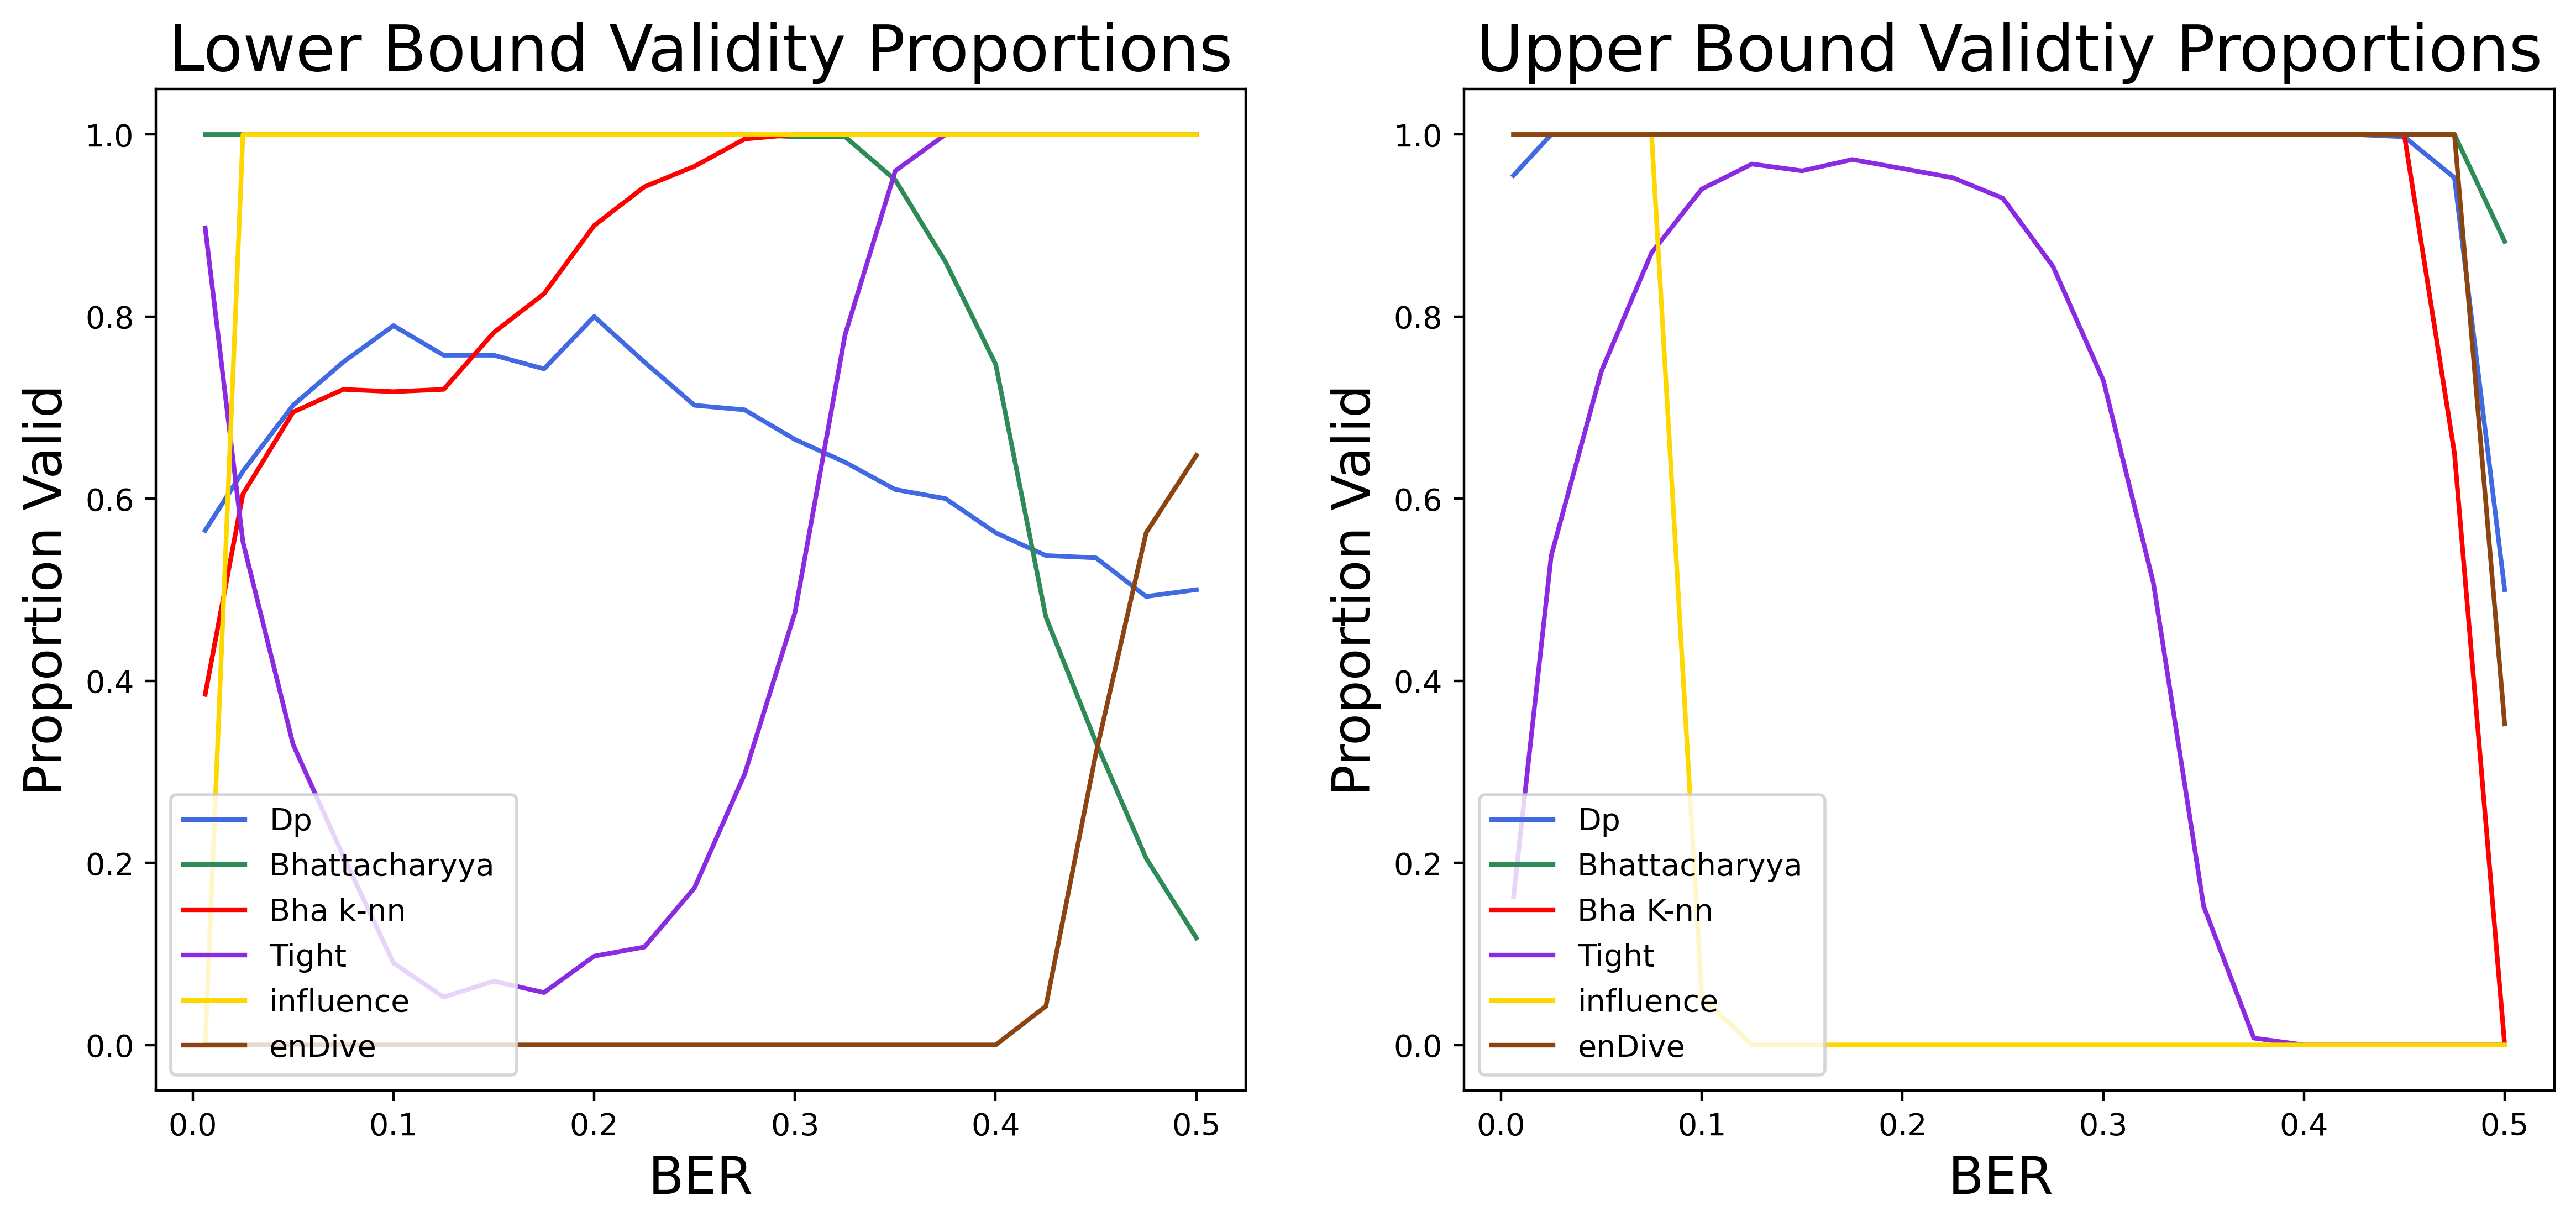

In [23]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi = dpi)

ax = axes[0]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df['Dp_lower'], 'royalblue',  label='Dp')

ax.plot(df['Bha_lower'],'seagreen', label='Bhattacharyya ')

ax.plot(df['Bha_knn_lower'],'r', label='Bha k-nn ')

ax.plot(df['tight_lower'], 'blueviolet', label='Tight ')

ax.plot(df['inf_lower'], 'gold', label= 'influence')

ax.plot(df['enDive_lower'], 'saddlebrown', label= 'enDive')


ax.set_xlabel("BER", fontsize = fs)
ax.set_ylabel("Proportion Valid", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend(loc=3)



ax = axes[1]

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df['Dp_upper'], 'royalblue',  label='Dp')

ax.plot(df['Bha_upper'],'seagreen', label='Bhattacharyya ')

ax.plot(df['Bha_knn_upper'],'r', label='Bha K-nn ')

ax.plot(df['tight_upper'], 'blueviolet', label='Tight ')

ax.plot(df['inf_upper'], 'gold', label= 'influence')

ax.plot(df['enDive_upper'], 'saddlebrown', label= 'enDive')

# ax.set_ylim([.4, 1.025])
# ax.set_yticks(np.linspace(.5,1,6))


ax.set_xlabel("BER ", fontsize = fs)
ax.set_ylabel("Proportion Valid", fontsize=fs)
ax.set_title("Upper Bound Validtiy Proportions" , fontsize = fs +4)
ax.legend(loc=3)


# plt.savefig("proportions_v2.jpeg",facecolor=(1,1,1,1))
plt.show()